## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_148406_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (64593, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac        lng  \
0      GSABZT036K000A240216061  2024-06-14 17:55:00  NaN  2.42  119.60462   
1      GSABZT036K000A240216061  2024-06-14 18:00:00  NaN  2.50  119.60462   
2      GSABZT036K000A240216061  2024-06-14 18:05:00  NaN  2.34  119.60462   
3      GSABZT036K000A240216061  2024-06-14 18:10:00  NaN  2.09  119.60462   
4      GSABZT036K000A240216061  2024-06-14 18:15:00  NaN  1.87  119.60462   
...                        ...                  ...  ...   ...        ...   
64588  GSABZT036K000A240216061  2025-05-10 18:45:00  0.0  0.00  119.60462   
64589  GSABZT036K000A240216061  2025-05-10 18:50:00  0.0  0.00  119.60462   
64590  GSABZT036K000A240216061  2025-05-10 18:55:00  0.0  0.00  119.60462   
64591  GSABZT036K000A240216061  2025-05-10 19:00:00  0.0  0.15  119.60462   
64592  GSABZT036K000A240216061  2025-05-10 19:05:00  0.0  0.00  119.60462   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      33.599495     斜屋顶双坡   15.0             NaN                   NaN  ...   
1      33.599495     斜屋顶双坡   15.0         32.7195               39.0975  ...   
2      33.599495     斜屋顶双坡   15.0             NaN                   NaN  ...   
3      33.599495     斜屋顶双坡   15.0             NaN                   NaN  ...   
4      33.599495     斜屋顶双坡   15.0         31.6151               43.8985  ...   
...          ...       ...    ...             ...                   ...  ...   
64588  33.599495     斜屋顶双坡   15.0         16.2506               71.4830  ...   
64589  33.599495     斜屋顶双坡   15.0             NaN                   NaN  ...   
64590  33.599495     斜屋顶双坡   15.0             NaN                   NaN  ...   
64591  33.599495     斜屋顶双坡   15.0         15.9531               72.3086  ...   
64592  33.599495     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                       99.2627            43.8961          4.0716   
2                           NaN                NaN             NaN   
3                           NaN                NaN             NaN   
4                       69.4091            31.5472          4.5651   
...                         ...                ...             ...   
64588                    2.5220             6.2163          2.6160   
64589                       NaN                NaN             NaN   
64590                       NaN                NaN             NaN   
64591                    1.2610             3.1082          2.5247   
64592                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1              5.3917           5.6970             89.8915   
2                 NaN              NaN                 NaN   
3                 NaN              NaN                 NaN   
4              6.1818           6.5608             84.3914   
...               ...              ...                 ...   
64588          5.0667           5.7690            289.4114   
64589             NaN              NaN                 NaN   
64590             NaN              NaN                 NaN   
64591          5.0480           5.7816            286.5757   
64592             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                 91.0845              91.5588  2024-06-14 18:00:00   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                 85.7108              86.2315  2024-06-14 18:15:00   
...                   ...                  ...                  ...   
64588            293.7344             294.7562  2025-05-10 

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0     2024-06-14 17:55:00  GSABZT036K000A240216061  2024-06-14 17:55:00  NaN   
1     2024-06-14 18:00:00  GSABZT036K000A240216061  2024-06-14 18:00:00  NaN   
2     2024-06-14 18:05:00  GSABZT036K000A240216061  2024-06-14 18:05:00  NaN   
3     2024-06-14 18:10:00  GSABZT036K000A240216061  2024-06-14 18:10:00  NaN   
4     2024-06-14 18:15:00  GSABZT036K000A240216061  2024-06-14 18:15:00  NaN   
...                   ...                      ...                  ...  ...   
95050 2025-05-10 18:45:00  GSABZT036K000A240216061  2025-05-10 18:45:00  0.0   
95051 2025-05-10 18:50:00  GSABZT036K000A240216061  2025-05-10 18:50:00  0.0   
95052 2025-05-10 18:55:00  GSABZT036K000A240216061  2025-05-10 18:55:00  0.0   
95053 2025-05-10 19:00:00  GSABZT036K000A240216061  2025-05-10 19:00:00  0.0   
95054 2025-05-10 19:05:00  GSABZT036K000A240216061  2025-05-10 19:05:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      2.42  119.60462  33.599495     斜屋顶双坡   15.0             NaN  ...   
1      2.50  119.60462  33.599495     斜屋顶双坡   15.0         32.7195  ...   
2      2.34  119.60462  33.599495     斜屋顶双坡   15.0             NaN  ...   
3      2.09  119.60462  33.599495     斜屋顶双坡   15.0             NaN  ...   
4      1.87  119.60462  33.599495     斜屋顶双坡   15.0         31.6151  ...   
...     ...        ...        ...       ...    ...             ...  ...   
95050  0.00  119.60462  33.599495     斜屋顶双坡   15.0         16.2506  ...   
95051  0.00  119.60462  33.599495     斜屋顶双坡   15.0             NaN  ...   
95052  0.00  119.60462  33.599495     斜屋顶双坡   15.0             NaN  ...   
95053  0.15  119.60462  33.599495     斜屋顶双坡   15.0         15.9531  ...   
95054  0.00  119.60462  33.599495     斜屋顶双坡   15.0             NaN  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1               21.5481                   99.2627            43.8961   
2                   NaN                       NaN                NaN   
3                   NaN                       NaN                NaN   
4               12.5989                   69.4091            31.5472   
...                 ...                       ...                ...   
95050            0.2960                    2.5220             6.2163   
95051               NaN                       NaN                NaN   
95052               NaN                       NaN                NaN   
95053            0.1480                    1.2610             3.1082   
95054               NaN                       NaN                NaN   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1              4.0716          5.3917           5.6970             89.8915   
2                 NaN             NaN              NaN                 NaN   
3                 NaN             NaN              NaN                 NaN   
4              4.5651          6.1818           6.5608             84.3914   
...               ...             ...              ...                 ...   
95050          2.6160          5.0667           5.7690            289.4114   
95051             NaN             NaN              NaN                 NaN   
95052             NaN             NaN              NaN                 NaN   
95053          2.5247          5.0480           5.7816            286.5757   
95054             NaN             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                 91.0845              91.5588  2024-06-14 18:00:00  
2                     NaN                  NaN                  NaN  
3                     NaN                  NaN                  NaN  
4 

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([   20,    21,    22,    23,    24,    25,    26,    27,    28,    29,
        ...
        94873, 94874, 94875, 94876, 94877, 94878, 94879, 94880, 94881, 94882],
       dtype='int64', length=45683),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([   20,    21,    22,    23,    24,    25,    26,    27,    28,    29,
        ...
        94873, 94874, 94875, 94876, 94877, 94878, 94879, 94880, 94881, 94882],
       dtype='int64', length=45683),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
        ...
        94873, 94874, 94875, 94876, 94877, 94878, 94879, 94880, 94881, 94882],
       dtype='int64', length=46207),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([   20,    21,    22,    23,    24,    25,    26,    27,    28,    29,
        ...
        94873, 94874, 94875, 94876, 94877, 94878, 94879, 94880, 94881, 94882],
       dtype='int64', length=45683),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([   20,    21,    22,    23,    24,    25,    26,    27,    28,    29,
        ...
        94873, 94874, 94875, 94876, 94877, 94878, 94879, 94880, 94881, 94882],
       dtype='int64', length=45683),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    0,     2,     3,     5,     6,     8,     9,    11,    12,    14,
        ...
        95040, 95042, 95043, 95045, 95046, 95048, 95049, 95051, 95052, 95054],
       dtype='int64', length=63370),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0     2024-06-14 17:55:00  GSABZT036K000A240216061  2024-06-14 17:55:00  0.0   
1     2024-06-14 18:00:00  GSABZT036K000A240216061  2024-06-14 18:00:00  0.0   
2     2024-06-14 18:05:00  GSABZT036K000A240216061  2024-06-14 18:05:00  0.0   
3     2024-06-14 18:10:00  GSABZT036K000A240216061  2024-06-14 18:10:00  0.0   
4     2024-06-14 18:15:00  GSABZT036K000A240216061  2024-06-14 18:15:00  0.0   
...                   ...                      ...                  ...  ...   
95050 2025-05-10 18:45:00  GSABZT036K000A240216061  2025-05-10 18:45:00  0.0   
95051 2025-05-10 18:50:00  GSABZT036K000A240216061  2025-05-10 18:50:00  0.0   
95052 2025-05-10 18:55:00  GSABZT036K000A240216061  2025-05-10 18:55:00  0.0   
95053 2025-05-10 19:00:00  GSABZT036K000A240216061  2025-05-10 19:00:00  0.0   
95054 2025-05-10 19:05:00  GSABZT036K000A240216061  2025-05-10 19:05:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      2.42  119.60462  33.599495     斜屋顶双坡   15.0             NaN  ...   
1      2.50  119.60462  33.599495     斜屋顶双坡   15.0       32.719500  ...   
2      2.34  119.60462  33.599495     斜屋顶双坡   15.0       32.351367  ...   
3      2.09  119.60462  33.599495     斜屋顶双坡   15.0       31.983233  ...   
4      1.87  119.60462  33.599495     斜屋顶双坡   15.0       31.615100  ...   
...     ...        ...        ...       ...    ...             ...  ...   
95050  0.00  119.60462  33.599495     斜屋顶双坡   15.0       16.250600  ...   
95051  0.00  119.60462  33.599495     斜屋顶双坡   15.0       16.151433  ...   
95052  0.00  119.60462  33.599495     斜屋顶双坡   15.0       16.052267  ...   
95053  0.15  119.60462  33.599495     斜屋顶双坡   15.0       15.953100  ...   
95054  0.00  119.60462  33.599495     斜屋顶双坡   15.0       15.953100  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1             21.548100                 99.262700          43.896100   
2             18.565033                 89.311500          39.779800   
3             15.581967                 79.360300          35.663500   
4             12.598900                 69.409100          31.547200   
...                 ...                       ...                ...   
95050          0.296000                  2.522000           6.216300   
95051          0.246667                  2.101667           5.180267   
95052          0.197333                  1.681333           4.144233   
95053          0.148000                  1.261000           3.108200   
95054          0.148000                  1.261000           3.108200   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1            4.071600        5.391700         5.697000           89.891500   
2            4.236100        5.655067         5.984933           88.058133   
3            4.400600        5.918433         6.272867           86.224767   
4            4.565100        6.181800         6.560800           84.391400   
...               ...             ...              ...                 ...   
95050        2.616000        5.066700         5.769000          289.411400   
95051        2.585567        5.060467         5.773200          288.466167   
95052        2.555133        5.054233         5.777400          287.520933   
95053        2.524700        5.048000         5.781600          286.575700   
95054        2.524700        5.048000         5.781600          286.575700   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1               91.084500            91.558800  2024-06-14 18:00:00  
2               89.293267            89.783033                  NaN  
3               87.502033            88.007267                  NaN  
4 

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=95055, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-06-14 17:55:00 2024-06-14 17:55:00  GSABZT036K000A240216061   
2024-06-14 18:00:00 2024-06-14 18:00:00  GSABZT036K000A240216061   
2024-06-14 18:05:00 2024-06-14 18:05:00  GSABZT036K000A240216061   
2024-06-14 18:10:00 2024-06-14 18:10:00  GSABZT036K000A240216061   
2024-06-14 18:15:00 2024-06-14 18:15:00  GSABZT036K000A240216061   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT036K000A240216061   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT036K000A240216061   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT036K000A240216061   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT036K000A240216061   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT036K000A240216061   

                                     ts   er   pac        lng        lat  \
ts                                                                         
2024-06-14 17:55:00 2024-06-14 17:55:00  0.0  2.42  119.60462  33.599495   
2024-06-14 18:00:00 2024-06-14 18:00:00  0.0  2.50  119.60462  33.599495   
2024-06-14 18:05:00 2024-06-14 18:05:00  0.0  2.34  119.60462  33.599495   
2024-06-14 18:10:00 2024-06-14 18:10:00  0.0  2.09  119.60462  33.599495   
2024-06-14 18:15:00 2024-06-14 18:15:00  0.0  1.87  119.60462  33.599495   
...                                 ...  ...   ...        ...        ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.00  119.60462  33.599495   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.00  119.60462  33.599495   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.00  119.60462  33.599495   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.15  119.60462  33.599495   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  119.60462  33.599495   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-06-14 17:55:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-14 18:00:00     斜屋顶双坡   15.0       32.719500  ...         21.548100   
2024-06-14 18:05:00     斜屋顶双坡   15.0       32.351367  ...         18.565033   
2024-06-14 18:10:00     斜屋顶双坡   15.0       31.983233  ...         15.581967   
2024-06-14 18:15:00     斜屋顶双坡   15.0       31.615100  ...         12.598900   
...                       ...    ...             ...  ...               ...   
2025-05-10 18:45:00     斜屋顶双坡   15.0       16.250600  ...          0.296000   
2025-05-10 18:50:00     斜屋顶双坡   15.0       16.151433  ...          0.246667   
2025-05-10 18:55:00     斜屋顶双坡   15.0       16.052267  ...          0.197333   
2025-05-10 19:00:00     斜屋顶双坡   15.0       15.953100  ...          0.148000   
2025-05-10 19:05:00     斜屋顶双坡   15.0       15.953100  ...          0.148000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-06-14 17:55:00                       NaN                NaN   
2024-06-14 18:00:00                 99.262700          43.896100   
2024-06-14 18:05:00                 89.311500          39.779800   
2024-06-14 18:10:00                 79.360300          35.663500   
2024-06-14 18:15:00                 69.409100          31.547200   
...                                       ...                ...   
2025-05-10 18:45:00                  2.522000           6.216300   
2025-05-10 18:50:00                  2.101667           5.180267   
2025-05-10 18:55:00                  1.681333           4.144233   
2025-05-10 19:00:00                  1.261000           3.108200   
2025-05-10 19:05:00                  1.261000           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-06-14 17:55:00             NaN             NaN              NaN   
2024-06-14 18:00:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-06-14 17:55:00 2024-06-14 17:55:00  GSABZT036K000A240216061   
2024-06-14 18:00:00 2024-06-14 18:00:00  GSABZT036K000A240216061   
2024-06-14 18:05:00 2024-06-14 18:05:00  GSABZT036K000A240216061   
2024-06-14 18:10:00 2024-06-14 18:10:00  GSABZT036K000A240216061   
2024-06-14 18:15:00 2024-06-14 18:15:00  GSABZT036K000A240216061   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT036K000A240216061   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT036K000A240216061   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT036K000A240216061   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT036K000A240216061   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT036K000A240216061   

                                     ts   er   pac        lng        lat  \
2024-06-14 17:55:00 2024-06-14 17:55:00  0.0  2.42  119.60462  33.599495   
2024-06-14 18:00:00 2024-06-14 18:00:00  0.0  2.50  119.60462  33.599495   
2024-06-14 18:05:00 2024-06-14 18:05:00  0.0  2.34  119.60462  33.599495   
2024-06-14 18:10:00 2024-06-14 18:10:00  0.0  2.09  119.60462  33.599495   
2024-06-14 18:15:00 2024-06-14 18:15:00  0.0  1.87  119.60462  33.599495   
...                                 ...  ...   ...        ...        ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.00  119.60462  33.599495   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.00  119.60462  33.599495   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.00  119.60462  33.599495   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.15  119.60462  33.599495   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  119.60462  33.599495   

                    roof_type  angle  temperature_2m  ...  \
2024-06-14 17:55:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-14 18:00:00     斜屋顶双坡   15.0       32.719500  ...   
2024-06-14 18:05:00     斜屋顶双坡   15.0       32.351367  ...   
2024-06-14 18:10:00     斜屋顶双坡   15.0       31.983233  ...   
2024-06-14 18:15:00     斜屋顶双坡   15.0       31.615100  ...   
...                       ...    ...             ...  ...   
2025-05-10 18:45:00     斜屋顶双坡   15.0       16.250600  ...   
2025-05-10 18:50:00     斜屋顶双坡   15.0       16.151433  ...   
2025-05-10 18:55:00     斜屋顶双坡   15.0       16.052267  ...   
2025-05-10 19:00:00     斜屋顶双坡   15.0       15.953100  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       15.953100  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-06-14 17:55:00                       NaN                NaN   
2024-06-14 18:00:00                 99.262700          43.896100   
2024-06-14 18:05:00                 89.311500          39.779800   
2024-06-14 18:10:00                 79.360300          35.663500   
2024-06-14 18:15:00                 69.409100          31.547200   
...                                       ...                ...   
2025-05-10 18:45:00                  2.522000           6.216300   
2025-05-10 18:50:00                  2.101667           5.180267   
2025-05-10 18:55:00                  1.681333           4.144233   
2025-05-10 19:00:00                  1.261000           3.108200   
2025-05-10 19:05:00                  1.261000           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-06-14 17:55:00             NaN             NaN              NaN   
2024-06-14 18:00:00        4.071600        5.391700         5.697000   
2024-06-14 18:05:00        4.236100        5.655067         5.984933   
2024-06-14 18:10:00        4.400600        5.918433         6.272867   
2024-06-14 18:15:00        4.565100        6.181800         6.560800   
...                             ...             ...              ...   
2025-05-10 18:45:00        2.616000        5.066700         5.769000   
2025-05-10 18:50:00        2.585567        5.060467         5.773200   
2025-05-10 18:55:00        2.555133        5.054233         5.777400   
2025-05-10 19:00:00        2.5

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-06-14 17:55:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(95055, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    15.771316
1        relative_humidity_2m    66.013717
2                dew_point_2m     8.590997
3                pressure_msl  1016.737573
4            surface_pressure  1015.534782
5   precipitation_probability    11.342688
6                 cloud_cover    53.716402
7             cloud_cover_low    13.088996
8             cloud_cover_mid    21.217045
9            cloud_cover_high    41.836545
10        shortwave_radiation   168.107116
11           direct_radiation    96.531187
12   direct_normal_irradiance   160.032529
13          diffuse_radiation    71.575928
14             wind_speed_10m     3.028554
15             wind_speed_80m     4.987716
16            wind_speed_120m     5.525910
17         wind_direction_10m   165.843001
18         wind_direction_80m   163.689294
19        wind_direction_120m   162.975990
20                   pac_copy     5.745699

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m    114.602786
1        relative_humidity_2m    491.860006
2                dew_point_2m    161.345680
3                pressure_msl    106.220232
4            surface_pressure    105.184235
5   precipitation_probability    856.485718
6                 cloud_cover   1877.006967
7             cloud_cover_low    774.475565
8             cloud_cover_mid   1226.056181
9            cloud_cover_high   1895.774974
10        shortwave_radiation  55482.287763
11           direct_radiation  26273.605367
12   direct_normal_irradiance  55061.445986
13          diffuse_radiation   8392.771140
14             wind_speed_10m      2.171913
15             wind_speed_80m      4.407529
16            wind_speed_120m      5.276810
17         wind_direction_10m  10123.147785
18         wind_direction_80m   9762.660729
19        wind_direction_120m   9679.429955
20                   pac_copy     75.185853

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m           10.705269
1        relative_humidity_2m           22.177917
2                dew_point_2m           12.702192
3                pressure_msl           10.306320
4            surface_pressure           10.255937
5   precipitation_probability           29.265777
6                 cloud_cover           43.324438
7             cloud_cover_low           27.829401
8             cloud_cover_mid           35.015085
9            cloud_cover_high           43.540498
10        shortwave_radiation          235.546785
11           direct_radiation          162.091349
12   direct_normal_irradiance          234.651755
13          diffuse_radiation           91.612069
14             wind_speed_10m            1.473741
15             wind_speed_80m            2.099412
16            wind_speed_120m            2.297131
17         wind_direction_10m          100.613855
18         wind_direction_80m           98.806178
19        wind_direction_120m           98.384094
20                   pac_copy            8.670978

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.4054
1        relative_humidity_2m    99.6937
2                dew_point_2m    28.5795
3                pressure_msl  1040.1781
4            surface_pressure  1038.8744
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   919.2058
11           direct_radiation   701.8665
12   direct_normal_irradiance   820.0895
13          diffuse_radiation   412.2401
14             wind_speed_10m    10.0902
15             wind_speed_80m    14.8304
16            wind_speed_120m    15.9875
17         wind_direction_10m   358.1091
18         wind_direction_80m   358.2545
19        wind_direction_120m   358.1193
20                   pac_copy    39.3400

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -7.3914
1        relative_humidity_2m     6.4101
2                dew_point_2m   -30.0428
3                pressure_msl   993.1012
4            surface_pressure   991.9678
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0928
15             wind_speed_80m     0.1898
16            wind_speed_120m     0.1908
17         wind_direction_10m     1.3741
18         wind_direction_80m     1.0048
19        wind_direction_120m     1.4640
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    15.953050
1        relative_humidity_2m    69.856433
2                dew_point_2m     8.612650
3                pressure_msl  1017.741567
4            surface_pressure  1016.527967
5   precipitation_probability     0.000000
6                 cloud_cover    62.154033
7             cloud_cover_low     0.004100
8             cloud_cover_mid     0.484400
9            cloud_cover_high    20.837983
10        shortwave_radiation    14.839917
11           direct_radiation     1.104750
12   direct_normal_irradiance     5.640933
13          diffuse_radiation    11.561667
14             wind_speed_10m     2.776967
15             wind_speed_80m     4.907300
16            wind_speed_120m     5.493750
17         wind_direction_10m   156.312067
18         wind_direction_80m   155.574983
19        wind_direction_120m   155.240367
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333        9.567278             57.915067      1.308700   1010.315633   
0.666667       23.049667             79.759511     16.051011   1022.994244   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1009.151067                        0.0    12.694356   
0.666667       1021.757589                        0.0    97.585900   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.000000          0.015544  ...   
0.666667         2.402033         9.496944         80.838244  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         49.742311                134.744089         102.036533   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.207489        3.999300         4.456767          104.230589   
0.666667        3.456900        5.788756         6.478767          213.613067   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333          102.878944           102.708811      0.00  
0.666667          209.891567           208.998256      5.31  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.182846      0.872913   
relative_humidity_2m             0.182846              1.000000      0.625580   
dew_point_2m                     0.872913              0.625580      1.000000   
pressure_msl                    -0.856101             -0.295508     -0.810307   
surface_pressure                -0.854924             -0.295802     -0.809511   
precipitation_probability        0.231738              0.310018      0.323563   
cloud_cover                      0.186469              0.254268      0.272851   
cloud_cover_low                  0.105808              0.245227      0.200667   
cloud_cover_mid                 -0.043749              0.198156      0.058018   
cloud_cover_high                 0.174439              0.192733      0.228952   
shortwave_radiation              0.318370             -0.387839      0.065950   
direct_radiation                 0.262711             -0.402764      0.010982   
direct_normal_irradiance         0.167002             -0.442656     -0.083756   
diffuse_radiation                0.353751             -0.284566      0.150137   
wind_speed_10m                   0.173154             -0.252499      0.007957   
wind_speed_80m                   0.019470             -0.124985     -0.050353   
wind_speed_120m                 -0.018256             -0.094545     -0.065084   
wind_direction_10m              -0.254286             -0.234100     -0.319025   
wind_direction_80m              -0.220141             -0.246795     -0.298191   
wind_direction_120m             -0.204248             -0.251941     -0.287761   
pac_copy                         0.324777             -0.420919      0.052041   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.856101         -0.854924   
relative_humidity_2m          -0.295508         -0.295802   
dew_point_2m                  -0.810307         -0.809511   
pressure_msl                   1.000000          0.999997   
surface_pressure               0.999997          1.000000   
precipitation_probability     -0.268357         -0.268345   
cloud_cover                   -0.170314         -0.170111   
cloud_cover_low               -0.090805         -0.090656   
cloud_cover_mid                0.053838          0.053872   
cloud_cover_high              -0.195845         -0.195800   
shortwave_radiation           -0.114689         -0.113743   
direct_radiation              -0.070758         -0.069893   
direct_normal_irradiance       0.018918          0.019705   
diffuse_radiation             -0.169688         -0.168786   
wind_speed_10m                -0.164792         -0.164637   
wind_speed_80m                -0.102493         -0.102778   
wind_speed_120m               -0.084126         -0.084508   
wind_direction_10m             0.154754          0.154190   
wind_direction_80m             0.104065          0.103461   
wind_direction_120m            0.086718          0.086119   
pac_copy                      -0.111006         -0.110019   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.231738     0.186469   
relative_humidity_2m                        0.310018     0.254268   
dew_point_2m                                0.323563     0.272851   
pressure_msl                               -0.268357    -0.170314   
surface_pressure                           -0.268345    -0.170111   
precipitation_probability                   1.000000     0.312492   
cloud_cover                                 0.312492     1.000000   
cloud_cover_low                             0.349520     0.385031   
cloud_cover_mid                             0.445192     0.537065   
cloud_cover_high                            0.240666     0.831074   
shortwave_radiation                        -0.022347    -0.123397   
direct_radiation                           -0.073687    -0.244247   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.851489
1        relative_humidity_2m          0.418705
2                dew_point_2m          0.968070
3                pressure_msl          0.974528
4            surface_pressure          0.974539
5   precipitation_probability          0.368573
6                 cloud_cover          0.504280
7             cloud_cover_low          0.474486
8             cloud_cover_mid          0.507557
9            cloud_cover_high          0.448613
10        shortwave_radiation         -0.368066
11           direct_radiation         -0.277256
12   direct_normal_irradiance         -0.276773
13          diffuse_radiation         -0.376278
14             wind_speed_10m          0.490383
15             wind_speed_80m          0.528374
16            wind_speed_120m          0.499058
17         wind_direction_10m          0.497952
18         wind_direction_80m          0.508498
19        wind_direction_120m          0.506737
20                   pac_copy         -0.326571

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 99651.50707466, 212336.25435953, 438494.72532518]),
 'fft_periods': array([95055,   144,   288])}

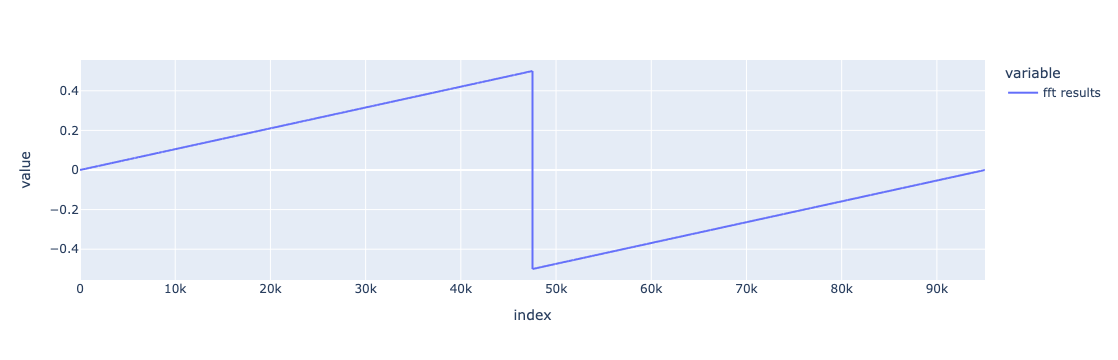

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -35.06429432300451,
  'P-value': 0.0,
  'Lags': np.int64(67),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -35.064
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-51.57905135299685),
  'P-value': 0.0,
  'Lags': 67,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -51.579
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -30.400399399760094,
  'P-value': 0.0,
  'Lags': np.int64(67),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -30.400
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}